In [4]:
import pickle
from GraphTsetlinMachine.graphs import Graphs
import numpy as np

with open('5x5__40_0.pkl', 'rb') as f:
    graphs_train, graphs_test, X_train, Y_train, X_test, Y_test = pickle.load(f)


import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx
from matplotlib.lines import Line2D
import numpy as np


In [47]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx
from matplotlib.lines import Line2D
import numpy as np

def draw_hexagonal_skewed_graph(gt, graph_id, board_size=5, skew_factor=0.9, filename='hexskewedgraph.png'):
    """
    Draws a directed graph on a skewed hexagonal grid starting from bottom-left.
    Args:
        gt: Custom graph data structure.
        graph_id: ID of the graph to draw.
        board_size: Number of columns in the grid (default 5).
        skew_factor: Degree of horizontal skew per row.
        filename: Path to save the resulting graph plot.
    """
    # Initialize graph
    G = nx.MultiDiGraph()

    # Skewed hex grid layout
    pos = {}
    num_nodes = gt.number_of_graph_nodes[graph_id]
    total_rows = num_nodes // board_size

    for node_id in range(num_nodes):
        row = node_id // board_size
        col = node_id % board_size
        x = col + 0.5 * (row % 2) + skew_factor * row  # Skew effect
        y = total_rows - row  # Row inversion to start from bottom
        pos[str(node_id)] = (x, y)

    # Add edges to the graph
    for node_id in range(num_nodes):
        node_start = gt.node_index[graph_id] + node_id
        edge_count = gt.graph_node_edge_counter[node_start]

        for node_edge_num in range(edge_count):
            edge_index = gt.edge_index[node_start] + node_edge_num
            target_node, edge_weight = gt.edge[edge_index]
            G.add_edge(str(node_id), str(target_node), weight=edge_weight)

    # Color mapping for edges
    num_edge_types = len(gt.edge_type_id)
    colorslist = cm.rainbow(np.linspace(0, 1, num_edge_types))

    # Create a larger figure
    plt.figure(figsize=(12, 8))

    # Draw nodes with hexagon shape
    nx.draw_networkx_nodes(G, pos, node_size=900, node_shape='h',
                           node_color='lightgray', edgecolors='black')
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

    # Draw edges
    legend_elements = []
    for k, color in enumerate(colorslist):
        current_edges = [(u, v) for u, v, d in G.edges(data=True) if int(d["weight"]) == k]
        edge_label = next((key for key, val in gt.edge_type_id.items() if val == k), "Unknown")
        legend_elements.append(Line2D([0], [0], color=color, lw=1.5, label=edge_label))

        nx.draw_networkx_edges(G, pos, edgelist=current_edges, edge_color=color, width=1.5)

    # Add legend
    plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1),
               frameon=False, fontsize=12)

    # Adjust plot
    plt.title(f'Hex Graph {graph_id}')
    plt.axis('off')
    plt.tight_layout(rect=[0, 0, 0.85, 1])

    # Save and show
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()


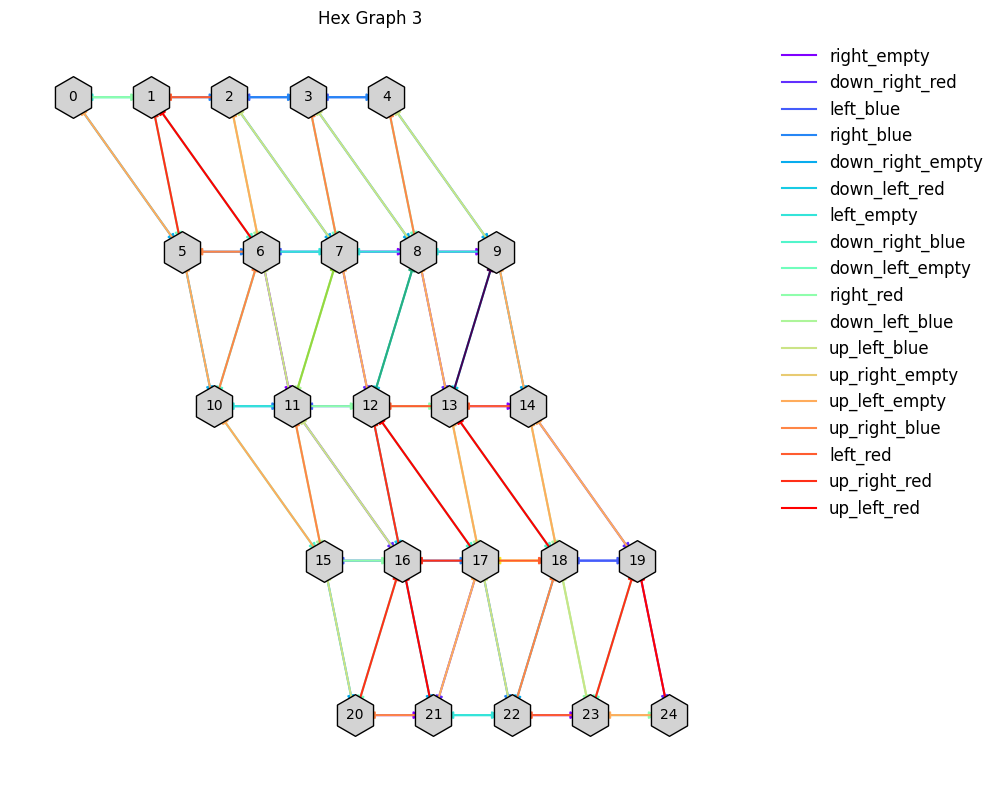

In [48]:

draw_hexagonal_skewed_graph(graphs_train, 3, board_size=5, filename='plotgraph.png')

In [53]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx
from matplotlib.lines import Line2D
import numpy as np

def draw_hexagonal_graph(gt, graph_id, board_size=5, filename='hexgraph.png'):
    """
    Tegner en rettkantet graf som er skewed for å ligne et hexagonalt brett.
    Args:
        gt: Grafdatastruktur (kanter, noder og typer).
        graph_id: ID til grafen som skal tegnes.
        board_size: Brettets bredde (standard er 5 for 5x5 grid).
        filename: Sti for å lagre plottet.
    """
    # Initialiser graf
    G = nx.Graph()

    # Hexagonal layout: Forskyv annenhver rad med 0.5
    pos = {}
    num_nodes = gt.number_of_graph_nodes[graph_id]
    for node_id in range(num_nodes):
        row = node_id // board_size
        col = node_id % board_size + 0.5 * (row % 2)  # Forskyv annenhver rad
        pos[str(node_id)] = (col, -row)

    # Legg til kanter
    for node_id in range(num_nodes):
        node_start = gt.node_index[graph_id] + node_id
        edge_count = gt.graph_node_edge_counter[node_start]

        for node_edge_num in range(edge_count):
            edge_index = gt.edge_index[node_start] + node_edge_num
            target_node, edge_weight = gt.edge[edge_index]
            G.add_edge(str(node_id), str(target_node), weight=edge_weight)

    # Farger for kantene
    num_edge_types = len(gt.edge_type_id)
    colorslist = cm.rainbow(np.linspace(0, 1, num_edge_types))

    # Plott større figur
    plt.figure(figsize=(10, 8))

    # Tegn noder
    nx.draw_networkx_nodes(G, pos, node_size=900, node_shape='h', 
                           node_color='lightgray', edgecolors='black')
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

    # Tegn kanter
    legend_elements = []
    for k, color in enumerate(colorslist):
        current_edges = [(u, v) for u, v, d in G.edges(data=True) if int(d["weight"]) == k]
        edge_label = next((key for key, val in gt.edge_type_id.items() if val == k), "Unknown")
        legend_elements.append(Line2D([0], [0], color=color, lw=1.5, label=edge_label))
        
        nx.draw_networkx_edges(G, pos, edgelist=current_edges, edge_color=color, width=1.5)

    # Legg til legend
    plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1), 
               frameon=False, fontsize=12)

    # Plottjustering
    plt.title(f'Hexagonal Graph {graph_id}')
 #   plt.gca().invert_yaxis()
    plt.axis('off')
    plt.tight_layout(rect=[0, 0, 0.85, 1])

    # Lagre og vis
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()


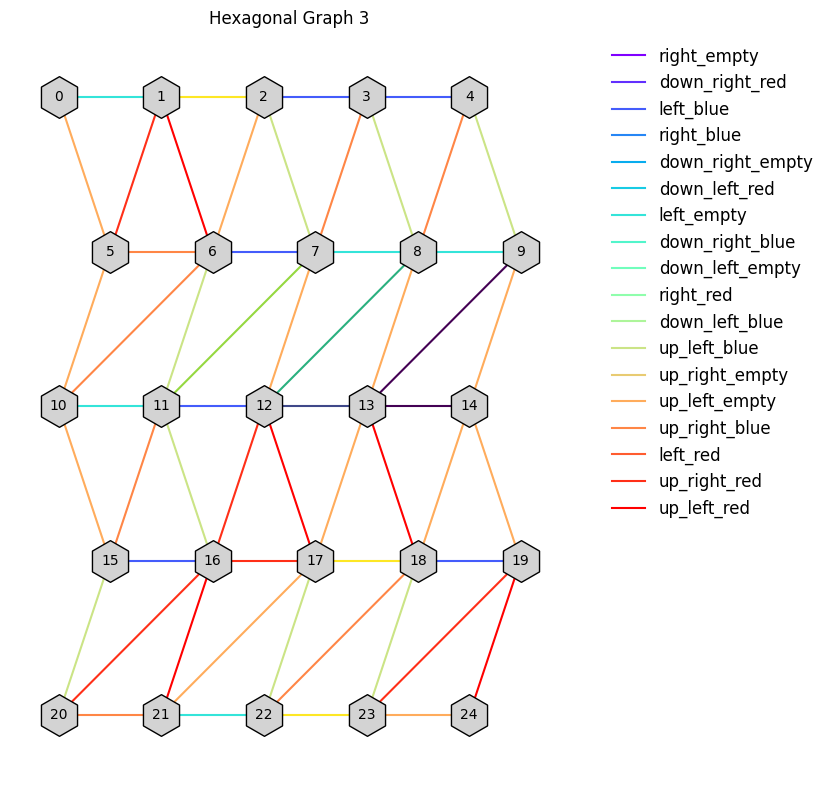

In [54]:
draw_hexagonal_graph(graphs_train, 3, board_size=5, filename='hexgraph.png')